In [3]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
from scipy.stats import spearmanr
from scipy import stats
# from sklearn.decomposition import PCA
import seaborn as sns
import random
import sys
import copy
from igraph import *
import time
import numpy as np
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

In [4]:
g = Graph.Read_Ncol("moreno_oz", directed = False)
with open('redes e centralidades/centralidades-moreno_oz-picke.txt', 'rb') as f:
    centralidade_list = pickle.load(f)

In [5]:
for i in centralidade_list:
    
    print sorted(i,reverse=True)[:10],'\n'

[0.37037037037037035, 0.3333333333333333, 0.2638888888888889, 0.2222222222222222, 0.2222222222222222, 0.21296296296296297, 0.21296296296296297, 0.20833333333333331, 0.2037037037037037, 0.2037037037037037] 

[0.07422590528432259, 0.04293348021862643, 0.03680083182722905, 0.03549312384234316, 0.035380564419383115, 0.030394204206260156, 0.0298511614259532, 0.027149305601897336, 0.026635509062699094, 0.025561156977727723] 

[0.011552349957999487, 0.010623947843228402, 0.010423508582099644, 0.010342983912884268, 0.009640856107951852, 0.009301631680085161, 0.00903778164565186, 0.00903546862795441, 0.008855053248427034, 0.008811430143799622] 

[0.4703398453398453, 0.461216874201788, 0.4495895580454404, 0.44864702228433884, 0.4449160699160699, 0.4439930075303519, 0.44124665903016413, 0.4403387440938881, 0.4358546428302029, 0.4340864698369769] 

[0.22374922053850713, 0.21957263024058915, 0.2020437186493784, 0.1934297893710101, 0.18419480512379177, 0.1750069007646312, 0.16702168904837977, 0.1568

In [6]:
X = np.array(centralidade_list)
X = X.transpose()
X[5] = stats.zscore(X[5])

# problemas de escala

# X = stats.zscore(X)
X.shape

(217, 7)

In [7]:
svd = TruncatedSVD(n_components=1)
svd.fit(X)
svd_values = svd.transform(X)
print(len(svd_values))

217


In [8]:
def calcula_SVD(matrix,col1,col2): # pca entre duas colunas
    vindex = [i for i in range(g.vcount())]
    
    Y = np.array([matrix[:,col1],matrix[:,col2]])
    Y = Y.transpose()
#     print (Y.shape)
#     print (Y,type(Y),type(Y[0]),len(Y[0]))
    svd = TruncatedSVD(n_components=1)
    svd.fit(Y)
    flat_list = svd.transform(Y)
    
#     pca = PCA(n_components=1,svd_solver='full')
#     teste = pca.fit_transform(Y)
#     explained_varience = pca.explained_variance_ratio_.sum()
#     print(float(pca.explained_variance_ratio_.sum()*100))
#     lista_teste = teste.tolist()
#     flat_list = []
#     for sublist in lista_teste:
#         for item in sublist:
#             flat_list.append(item)
    aflat, seeds_SVD = (list(x) for x in zip(*sorted(zip(flat_list, vindex), reverse=True)))
    return (seeds_SVD,np.array(flat_list))

In [9]:
def calcKendall(matrix):
    matrix_kendall = []
    for i in range(matrix.shape[1]):
        kend = []
        for j in range(matrix.shape[1]):
            tau, p_value = kendalltau(matrix[:,i],matrix[:,j])
            kend.append(tau)
        matrix_kendall.append(kend)
    matrix_kendall = np.array(matrix_kendall)
    return(matrix_kendall)

In [10]:
labels_medidas = ['0_grau','1_betweennes','2_pagerank','3_closeness','4_eigenvector_centrality','5_harmonic_centrality','6_load_centrality',]


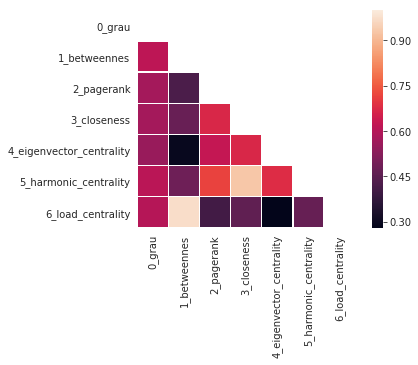

In [11]:
corr = calcKendall(X)
# sns.heatmap(,xticklabels=labels,yticklabels=labels,linewidths=.5)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask,square=True,xticklabels=labels_medidas,yticklabels=labels_medidas,linewidths=.5)

In [12]:
a = np.array(svd_values)
a = a.reshape(len(a),1)
X = np.append(X,a,axis=1)
X.shape

(217, 8)

In [13]:
matrix_teste = X

In [14]:
# Alta correlacao moreno_oz

c_1_6 = calcula_SVD(matrix_teste,1,6)
c_3_5 = calcula_SVD(matrix_teste,3,5)


In [15]:
# Baixa correlacao moreno_oz
c_1_2 = calcula_SVD(matrix_teste,1,2)
c_1_3 = calcula_SVD(matrix_teste,1,3)
c_1_4 = calcula_SVD(matrix_teste,1,4)
c_1_5 = calcula_SVD(matrix_teste,1,5)



In [16]:
#  adicionando na matrix temporaria moreno_oz
matrix_teste = np.hstack((matrix_teste, c_1_6[1]))
matrix_teste = np.hstack((matrix_teste, c_3_5[1]))
matrix_teste = np.hstack((matrix_teste, c_1_2[1]))
matrix_teste = np.hstack((matrix_teste, c_1_3[1]))
matrix_teste = np.hstack((matrix_teste, c_1_4[1]))
matrix_teste = np.hstack((matrix_teste, c_1_5[1]))
matrix_teste.shape



(217, 14)

In [17]:
labels = ['0_grau','1_betweennes','2_pagerank','3_closeness','4_eigenvector_centrality','5_harmonic_centrality','6_load_centrality','7_PCA_all','16','35','12','13','14','15']


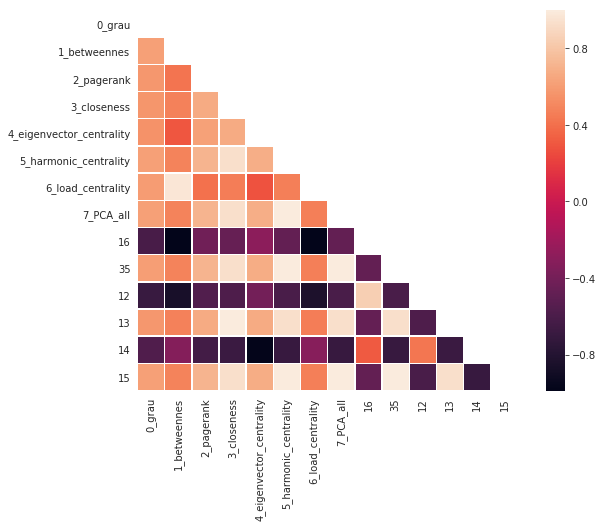

In [18]:
# 
a = plt.figure(figsize=(10,7))
corr = calcKendall(matrix_teste)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask,square=True,xticklabels=labels,yticklabels=labels,linewidths=.5)

In [19]:
vindex = [i for i in range(g.vcount())]

my_list = X
### my_list[0] = grau
### my_list[1] = betweenness
### my_list[2] = pagerank
### my_list[3] = closeness
### my_list[4] = eigenvector_centrality
### my_list[5] = harmonic_centrality
### my_list[6] = load_centrality 
### my_list[7] = PCA_all
### ...etc
aflat, seeds_grau = (list(x) for x in zip(*sorted(zip(my_list[:,0], vindex), reverse=True)))
aflat, seeds_betweennes = (list(x) for x in zip(*sorted(zip(my_list[:,1], vindex), reverse=True)))
aflat, seeds_pagerank = (list(x) for x in zip(*sorted(zip(my_list[:,2], vindex), reverse=True)))
aflat, seeds_closeness = (list(x) for x in zip(*sorted(zip(my_list[:,3], vindex), reverse=True)))
aflat, seeds_eigenvector_centrality = (list(x) for x in zip(*sorted(zip(my_list[:,4], vindex), reverse=True)))
aflat, seeds_harmonic_centrality = (list(x) for x in zip(*sorted(zip(my_list[:,5], vindex), reverse=True)))
aflat, seeds_load_centrality = (list(x) for x in zip(*sorted(zip(my_list[:,6], vindex), reverse=True)))
aflat, seeds_SVD = (list(x) for x in zip(*sorted(zip(svd_values, vindex), reverse=True)))

In [20]:
s = [seeds_grau[:50],seeds_betweennes[:50],
    seeds_pagerank[:50],seeds_closeness[:50],
    seeds_eigenvector_centrality[:50],seeds_harmonic_centrality[:50],
    seeds_load_centrality[:50],seeds_SVD[:50],c_1_6[0][:50],
    c_3_5[0][:50],c_1_2[0][:50],c_1_3[0][:50],
     c_1_4[0][:50],c_1_5[0][:50]]
with open('sementes-moreno_oz-SVD.txt', 'wb') as f:
    pickle.dump(s, f)